In [106]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn import metrics
import os
import seaborn as sns
import math
from keras.models import Sequential
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [27]:
# show upload dialog
from google.colab import files
uploaded = files.upload()

Saving temperature_data.csv to temperature_data (1).csv


In [107]:
import pandas as pd
df = pd.read_csv('temperature_data.csv',index_col=0)
df.head()

,Tokyo(Kanto),Neriima(Kanto),fuchu(Kanto),Naha(kyushu),fukuoka(kyushu),Dazaihu(kyushu)
timestep,,,,,,
1,5.3,4.5,4.2,18.3,6.8,5.2
2,6.2,5.6,4.3,17.8,6.0,4.8
3,4.9,4.1,3.7,17.4,5.4,3.3
4,5.1,3.8,4.0,19.9,6.9,4.8
5,7.4,6.5,6.0,22.1,8.2,7.0


In [108]:
INPUT_feature_col = [
    "Tokyo(Kanto)","Neriima(Kanto)","fuchu(Kanto)","Naha(kyushu)","fukuoka(kyushu)","Dazaihu(kyushu)"
    ]

In [109]:
#加えない
dataset = df[INPUT_feature_col].values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
df_ax = pd.DataFrame(dataset)
#answer = df_ax[OUTPUT_label_de].values
#answer = answer.astype('float32')

In [110]:
#標準化
"""

#noiseを加える 
array_a =  df_ax.loc[:,[0]]
array_0 = array_a.values
num = len(array_0)
array_noise=[]
num=float(num)
a = num*0.1
a = int(a)
a_1 = array_0[0] + (np.random.rand(a))

#plus_noise = array_a[0] + np.random.rand()
#print(plus_noise)
for i in range(2296):
    plus_noise = array_0[i] + np.random.rand()
    array_noise.append(plus_noise)

print(len(array_noise))
noise_ax = np.array(array_noise)
noise_ax.shape

dataset = noise_ax
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
df_ax = pd.DataFrame(dataset)
"""

'\n\n#noiseを加える \narray_a =  df_ax.loc[:,[0]]\narray_0 = array_a.values\nnum = len(array_0)\narray_noise=[]\nnum=float(num)\na = num*0.1\na = int(a)\na_1 = array_0[0] + (np.random.rand(a))\n\n#plus_noise = array_a[0] + np.random.rand()\n#print(plus_noise)\nfor i in range(2296):\n    plus_noise = array_0[i] + np.random.rand()\n    array_noise.append(plus_noise)\n\nprint(len(array_noise))\nnoise_ax = np.array(array_noise)\nnoise_ax.shape\n\ndataset = noise_ax\nscaler = MinMaxScaler()\ndataset = scaler.fit_transform(dataset)\ndf_ax = pd.DataFrame(dataset)\n'

In [111]:
df_ax

,0,1,2,3,4,5
0,0.151515,0.127036,0.129139,0.215686,0.056818,0.080139
1,0.181818,0.162866,0.132450,0.183007,0.026515,0.066202
2,0.138047,0.114007,0.112583,0.156863,0.003788,0.013937
3,0.144781,0.104235,0.122517,0.320261,0.060606,0.066202
4,0.222222,0.192182,0.188742,0.464052,0.109848,0.142857
5,0.151515,0.136808,0.125828,0.261438,0.125000,0.125436
6,0.154882,0.123779,0.119205,0.261438,0.098485,0.094077
7,0.127946,0.104235,0.102649,0.254902,0.117424,0.132404
8,0.124579,0.114007,0.122517,0.189542,0.064394,0.108014
9,0.040404,0.016287,0.000000,0.320261,0.060606,0.083624


In [112]:
from keras.layers import Dense, Dropout
%matplotlib inline
from keras.layers.convolutional import Conv1D, UpSampling1D
from keras.layers.pooling import MaxPooling1D

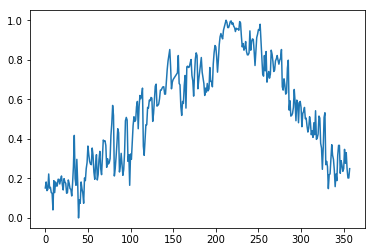

In [113]:
plt.plot(df_ax.loc[:,[0]])
plt.show()

In [114]:
rawdata = df_ax.loc[:, [0]]
raw_data = rawdata.values
raw_data = raw_data.reshape([358])
#raw_data_noise = noise_ax.reshape([358])
raw_data.shape

(358,)

In [115]:
input_data = []
output_data = []
for n in range(358-50):
    input_data.append(raw_data[n:n+50])
    output_data.append(raw_data[n:n+50])

input_data = np.array(input_data)
output_data = np.array(output_data)
print(input_data.shape)
print(output_data.shape)

(308, 50)
(308, 50)


In [116]:
#一次元畳み込み層における入力の形状(shape)は(<シーケンス長>, <パラメータ数>)
#つまり(<連続した数値>, <次元数>)
train_X = np.reshape(input_data,  (-1, 50, 1))
train_Y = np.reshape(output_data, (-1, 50))
print(train_X.shape)
print(train_Y.shape)

(308, 50, 1)
(308, 50)


In [117]:
#学習フェーズver.2
from keras.layers import Flatten
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=8,padding='same',input_shape=(50, 1)))
model.add(MaxPooling1D(pool_size=2,padding='same'))
model.add(Conv1D(16, 4, padding='same', activation='relu'))
model.add(MaxPooling1D(2, padding='same'))
model.add(Conv1D(8, 2, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.compile(loss='mse', optimizer='adam')

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_19 (Conv1D)           (None, 50, 32)            288       
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 25, 32)            0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 25, 16)            2064      
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 13, 16)            0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 13, 8)             264       
_________________________________________________________________
flatten_9 (Flatten)          (None, 104)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)              

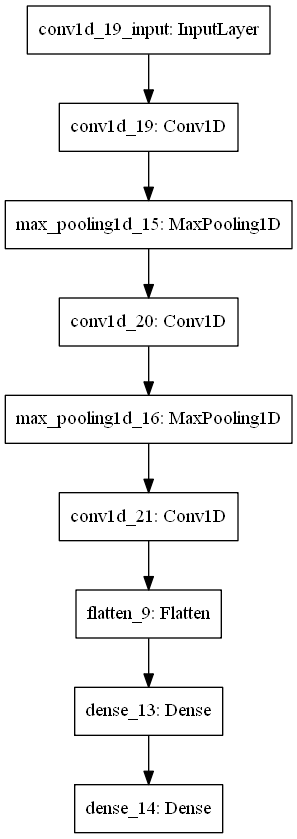

In [118]:
from keras.utils import plot_model
model.summary()
tf.keras.utils.plot_model(model)

In [119]:
epochs = 100

In [120]:
history = model.fit(train_X, train_Y, validation_split=0.1, epochs=epochs)

Train on 277 samples, validate on 31 samples
Epoch 1/100
277/277 [==============================] - 1s 4ms/step - loss: 0.3213 - val_loss: 0.0947
Epoch 2/100
277/277 [==============================] - 0s 318us/step - loss: 0.1605 - val_loss: 0.0732
Epoch 3/100
277/277 [==============================] - 0s 285us/step - loss: 0.1158 - val_loss: 0.0560
Epoch 4/100
277/277 [==============================] - 0s 292us/step - loss: 0.1016 - val_loss: 0.0552
Epoch 5/100
277/277 [==============================] - 0s 303us/step - loss: 0.0933 - val_loss: 0.0525
Epoch 6/100
277/277 [==============================] - 0s 263us/step - loss: 0.0869 - val_loss: 0.0528
Epoch 7/100
277/277 [==============================] - 0s 285us/step - loss: 0.0851 - val_loss: 0.0528
Epoch 8/100
277/277 [==============================] - 0s 343us/step - loss: 0.0846 - val_loss: 0.0516
Epoch 9/100
277/277 [==============================] - 0s 390us/step - loss: 0.0842 - val_loss: 0.0508
Epoch 10/100
277/277 [========

277/277 [==============================] - 0s 343us/step - loss: 0.0699 - val_loss: 0.0402
Epoch 80/100
277/277 [==============================] - 0s 375us/step - loss: 0.0698 - val_loss: 0.0402
Epoch 81/100
277/277 [==============================] - 0s 343us/step - loss: 0.0688 - val_loss: 0.0353
Epoch 82/100
277/277 [==============================] - 0s 346us/step - loss: 0.0598 - val_loss: 0.0331
Epoch 83/100
277/277 [==============================] - 0s 397us/step - loss: 0.0547 - val_loss: 0.0331
Epoch 84/100
277/277 [==============================] - 0s 437us/step - loss: 0.0539 - val_loss: 0.0321
Epoch 85/100
277/277 [==============================] - 0s 332us/step - loss: 0.0535 - val_loss: 0.0323
Epoch 86/100
277/277 [==============================] - 0s 530us/step - loss: 0.0532 - val_loss: 0.0321
Epoch 87/100
277/277 [==============================] - 0s 687us/step - loss: 0.0530 - val_loss: 0.0318
Epoch 88/100
277/277 [==============================] - 0s 424us/step - loss:

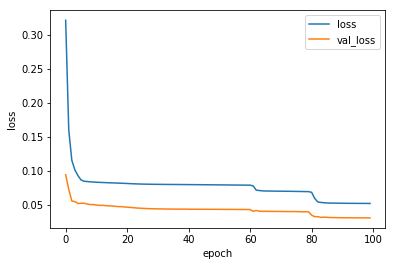

In [121]:
plt.plot(range(epochs), history.history['loss'], label='loss')
plt.plot(range(epochs), history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend() 
plt.show()

In [122]:
from keras import backend as K
getFeature = K.function([model.get_input_at(0), K.learning_phase()],  [model.layers[7].output])
exTrain = getFeature([train_X, 0])[0]

In [123]:
start = 0
for i in range(6):
    sheed = np.reshape(raw_data[start:start+50], (1, 50, 1))
    ans = raw_data[start:start+50]
    start += 50
    if i == 0:
        prediction = sheed
        res = model.predict(sheed)
        res = res.reshape(1,50,1)
        prediction = res
        answer = ans
    else:
        res = model.predict(sheed)
        res = res.reshape(1,50,1)
        prediction = np.concatenate((prediction, res), axis=1)
        answer = np.concatenate((answer, ans))

(1, 300, 1)
(300,)


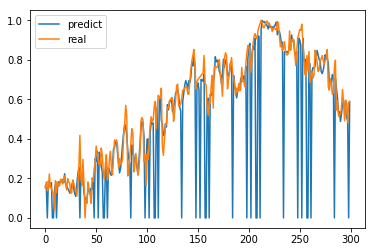

In [124]:
print(prediction.shape)
predictor = np.reshape(prediction, (-1))
print(predictor.shape)
plt.plot(range(len(predictor)), predictor, label='predict')
plt.plot(range(len(predictor)), answer, label='real')
plt.legend() 
plt.show()

In [126]:
from keras.models import Model
test_data = train_X[0][:][:]
test_data = test_data.reshape(1,50,1)
test_data.shape
middle_model = Model(inputs=model.input, outputs=model.get_layer("dense_13").output)
#Model(inputs=入力レイヤの入力, outputs=出力レイヤの出力)
middle_output = middle_model.predict(test_data)
#dataは入力データ